Task 1 : Fuzzy matching Algocore

Name: Devangan Mukherjee 

The following code uses Levenshtein Distance Algorithm to Correctly Identify the incorrectly spelt word.

First of all we import the libraries , and in an array we store the target words 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# List of correct career options
correct_careers = [
    "Doctor", "Lawyer", "Teacher", "Engineer", "Accountant",
    "Nurse", "Police", "Architect", "Dentist", "Pharmacist"
]

Function Definition: The function levenshtein_distance takes two strings, s1 and s2, as inputs.

Swapping Strings: The first if condition checks if the length of s1 is less than the length of s2. If true, it swaps the strings by calling levenshtein_distance(s2, s1). This ensures that s1 is always the longer (or equal length) string, optimizing the space complexity.

Empty String Case: The second if condition checks if s2 is empty. If s2 is empty, the distance is simply the length of s1 because it would take that many deletions to transform s1 into an empty string.

Previous Row Initialization: previous_row is initialized to a range object representing the distances from an empty string to each prefix of s2. For example, if s2 is "abc", previous_row will be [0, 1, 2, 3]. This initialization corresponds to the cost of inserting each character of s2 into an empty string.

Outer Loop (s1): The outer loop iterates over each character c1 in s1, with i as the index.
Current Row Initialization: At the start of each iteration of the outer loop, current_row is initialized with i + 1. This represents the cost of transforming the prefix of s1 up to i into an empty string by performing i + 1 deletions.
Inner Loop (s2): The inner loop iterates over each character c2 in s2, with j as the index.
Insertion Cost: insertions is calculated as previous_row[j + 1] + 1. This represents the cost of inserting c2 into the prefix of s1 to match the prefix of s2 up to j + 1.
Deletion Cost: deletions is calculated as current_row[j] + 1. This represents the cost of deleting c1 from the prefix of s1 to match the prefix of s2 up to j.
Substitution Cost: substitutions is calculated as previous_row[j] + (c1 != c2). If c1 and c2 are the same, the cost is previous_row[j] (no substitution needed). If they are different, the cost is previous_row[j] + 1 (one substitution needed).
Appending Minimum Cost: The minimum of insertions, deletions, and substitutions is appended to current_row, representing the minimum cost to transform the prefix of s1 up to i into the prefix of s2 up to j + 1.
Updating Previous Row: At the end of each iteration of the outer loop, previous_row is updated to be current_row, moving the comparison window one character further in s1.

In [47]:
# Function to calculate Levenshtein distance between two strings
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)
    if len(s2) == 0:
        return len(s1)
    
    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

The function correct_spelling takes a single argument word, which is the word whose spelling needs to be corrected.

min_distance: This variable is initialized to positive infinity (float('inf')). It will be used to keep track of the smallest Levenshtein distance encountered during the comparisons.

closest_match: This variable is initialized to None. It will store the word from the list that has the smallest Levenshtein distance to the input word.

Loop Through correct_careers: The for loop iterates over each word in the list correct_careers. This list is assumed to contain correctly spelled career names.

Compute Levenshtein Distance: For each career in the list, the function calculates the Levenshtein distance between the input word and the current career using the levenshtein_distance function. Both words are converted to lowercase to make the comparison case-insensitive (word.lower() and career.lower()).

Update Minimum Distance and Closest Match: The if statement checks if the computed distance is less than min_distance. If true, it updates min_distance to the new lower distance and sets closest_match to the current career. This ensures that closest_match always holds the word from the list with the smallest Levenshtein distance to the input word.

In [48]:
# Function to correct spelling using Levenshtein distance
def correct_spelling(word):
    min_distance = float('inf')
    closest_match = None
    for career in correct_careers:
        distance = levenshtein_distance(word.lower(), career.lower())
        if distance < min_distance:
            min_distance = distance
            closest_match = career
    return closest_match

Load CSV: The code uses pandas to read a CSV file named responses.csv into a DataFrame called responses_df.

Extract Responses: It extracts the "Response" column from the DataFrame and converts it to a list called responses.

Correct Spelling: It iterates over each response in the responses list, using the correct_spelling function to correct any spelling mistakes. The corrected responses are stored in a new list called corrected_responses.

Initialize Dictionary: An empty dictionary career_counts is initialized to store the frequency of each career choice.

Count Frequencies: It iterates over each corrected career in corrected_responses. For each career:
If the career is already in career_counts, its count is incremented by 1.
If the career is not in career_counts, it is added with an initial count of 1.

In [49]:
# Read responses from Xlsx file
responses_df = pd.read_csv("responses.csv")
responses = responses_df["Response"].tolist()

# Correcting spelling mistakes in responses
corrected_responses = [correct_spelling(response) for response in responses]

# Counting frequency of each career choice
career_counts = {}
for career in corrected_responses:
    if career in career_counts:
        career_counts[career] += 1
    else:
        career_counts[career] = 1

The provided code generates a bar chart to visualize the career aspirations of students based on the frequency of each career choice. Using the plt.bar function from the matplotlib library, it plots the career choices (keys of the career_counts dictionary) on the x-axis and their corresponding frequencies (values of the career_counts dictionary) on the y-axis. The x-axis is labeled "Career Choices," and the y-axis is labeled "Frequency" to clearly indicate what the axes represent. The chart is titled "Career Aspirations of Students" for context, and the x-axis labels are rotated 45 degrees to improve readability of the career names. Finally, plt.show() displays the bar chart.

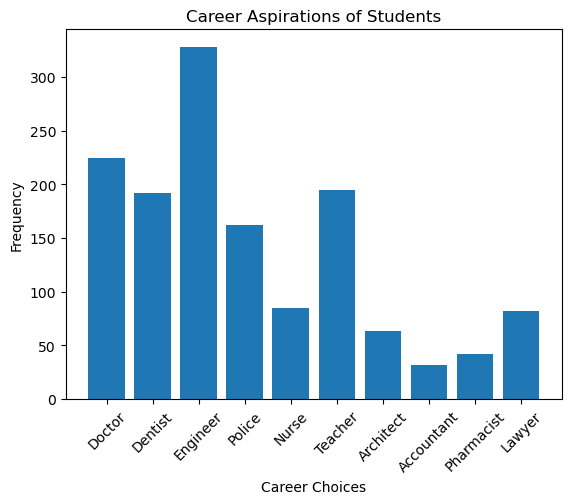

In [50]:
# Plotting the career aspirations of students
plt.bar(career_counts.keys(), career_counts.values())
plt.xlabel('Career Choices')
plt.ylabel('Frequency')
plt.title('Career Aspirations of Students')
plt.xticks(rotation=45)

plt.show()